In [1]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
df_megaset = pd.read_csv('../../data/megaset.csv')
df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916.0,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,2010.0,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#1 cheerleader camp,2010.0,NaN,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#horror,2015.0,NaN,NaN,NaN,NaN,1500000.0,NaN,NaN,NaN,NaN,NaN
4,$,1971.0,english,united states of america,"crime fiction, heist, action/adventure, thrill...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85115,…all the marbles,1981.0,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
85116,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85117,…men olsenbanden var ikke død,1984.0,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
85118,₤500 reward,1918.0,"silent film, english",NaN,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Genre Preference

Preferences in genre in US vs World for american movies (rank genres based on foreign revenues vs domestic revenues)

# Trope Preference

Preferences in TV tropes in US vs World for american movies (rank tropes based on foreign revenues vs domestic revenues)

# Proportion of Domestic vs Foreign gross for US movies

domestic vs foreign income, total and percentage, for american movies over time

# Budget Influence

budget vs foreign and domestic income for american movies

In [12]:
def remove_high_val(x):
    x = float(x)
    if x > 1:
        return False
    return True

initial length of the dataset: 85120
Length after removing all the Nans: 5058


,Name,Budget,domestic_percentage,foreign_percentage
26,(500) days of summer,7500000.0,0.533995,0.033157
81,10 cloverfield lane,5000000.0,0.665670,0.334330
94,10 things i hate about you,13000000.0,0.631940,0.368060
99,"10,000 b.c.",105000000.0,0.352272,0.647728
152,10th & wolf,8000000.0,0.380451,0.619549


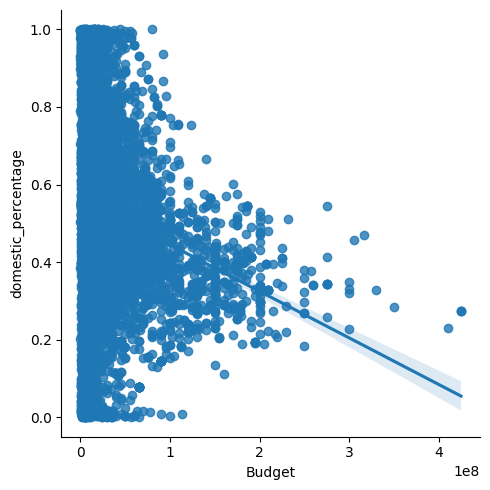

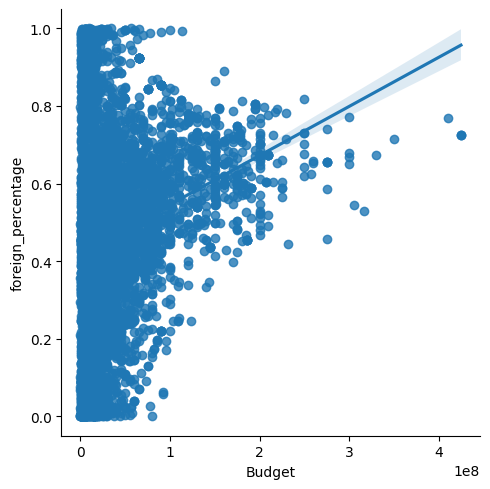

In [16]:
import seaborn as sn

df_meg_copy = df_megaset.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget', 'domestic_percentage', 'foreign_percentage']]

print(f"initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Budget'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['domestic_percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['foreign_percentage'].notna()]

print(f"Length after removing all the Nans: {len(df_meg_copy)}")
df_meg_copy = df_meg_copy[df_meg_copy.foreign_percentage < 1]
#print(len(ind))
#df_meg_copy.foreign_percentage = df_meg_copy.foreign_percentage.apply(lambda x: remove_special_character(x))

sn.lmplot(x='Budget',y='domestic_percentage', data=df_meg_copy)
sn.lmplot(x='Budget',y='foreign_percentage', data=df_meg_copy)
df_meg_copy.head()




# Market Changes

⁠let's look for movie industry big numbers internationally - market size for countries over time, is america losing its market share

# Languages ?

More languages = more world audience? for american movies... not gonna give much if it's just american movies